In [1]:
import tensorflow as tf
tf.__version__

/opt/homebrew/Caskroom/miniconda/base/envs/TF/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (3.0.0)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


'2.9.0'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
filename=["dcnn-A100","dcnn-t4","dcnn-v100","dcnn-rtx3050"]

In [40]:
import pickle
vars2=[]
def load_variables(filename=[],vars2=[]):
    for i in range(len(filename)):
        with open(f'time_var/{filename[i]}', 'rb') as file:
            vars2.append(pickle.load(file))
load_variables(filename,vars2)

In [41]:
vars2

[209.22806525230408, 314.5571882724762, 325.60185384750366, 193.44189620018005]

In [42]:
filename2=["Nvidia A100","Nvidia T4","Nvidia V100","Nvidia RTX-3050"]

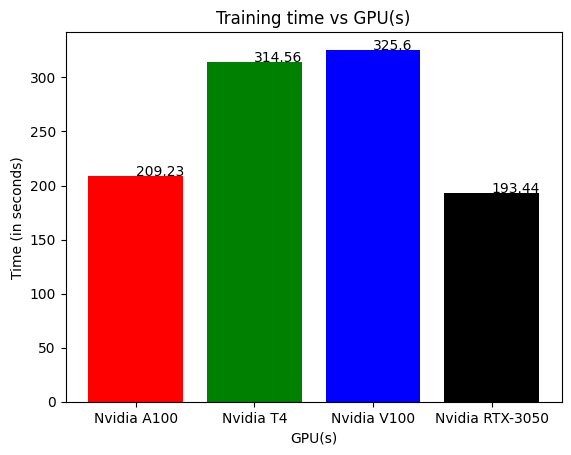

In [45]:
import matplotlib.pyplot as plt
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],round(y[i],2))
plt.bar(filename2,height=vars2, color=["r","g","b","black"])
addlabels(filename2,vars2)
plt.title("Training time vs GPU(s)")
plt.ylabel("Time (in seconds)")
plt.xlabel("GPU(s)")
plt.savefig("plot_model/plot_dcnn_gpu//GPU_Comparision")

In [ ]:
filename3 = ["history-A100","history-t4","history-v100","hist_dcnn.pkl"]

In [13]:
import pickle
def load_variables(filename=[]):
    for i in range(len(filename)):
        with open(f'history_var/{filename[i]}', 'rb') as file:
            vars2.append(pickle.load(file))
load_variables(filename,vars2)

[209.22806525230408, 314.5571882724762, 325.60185384750366, 193.44189620018005]

In [8]:
with open("history_var/hist_dcnn.pkl", "rb") as file:
        hist_dcnn = pickle.load(file)
hist_dcnn

In [2]:
import os
model_list = os.listdir("history_var")
model_list

['historyvgg19',
 'history-v100',
 'historyvgg16',
 'historyeffnetb4',
 'history-A100',
 'history-t4',
 'historyresnet',
 'hist_dcnn.pkl']

In [10]:
filenames = [model_list[0],model_list[2],model_list[3],model_list[6]]
filenames

['historyvgg19', 'historyvgg16', 'historyeffnetb4', 'historyresnet']

In [25]:
for i in range(len(filenames)):
    filenames[i]+=".json"
filenames


['historyvgg19.json',
 'historyvgg16.json',
 'historyeffnetb4.json',
 'historyresnet.json']

In [9]:
import pickle
filepath = "history_var"
filenames = [model_list[0],model_list[2],model_list[3],model_list[6]]
vars1 = []
for i in range(len(filenames)):
    with open(f"{filepath}/{filenames[i]}", 'rb') as f:
        vars1.append((pickle.load(f)))
vars1

In [6]:
with open("history_var/historyeffnetb4","rb") as file:
    effnet = pickle.load(file)
effnet

In [20]:
vars1_dict = []
for i in range(len(vars1)):
    vars1_dict.append(vars1[i].history)

In [26]:
json_dump(filepath = "hist_dict",
        filenames = filenames,
        dicts = vars1_dict)

In [14]:
import json
python_obj = eval(str(hist_dcnn.history))
json_obj = json.dumps(python_obj, indent=4)
with open("hist_dict/history_dcnn_rtx3050.json","w") as file:
    file.write(json_obj)

In [16]:
def json_dump(filepath: str = "", filenames: list = [], dicts: list = []) -> None:
    """
    Saves dictionary variables as json files

    Args:
    filepath (str): path to save the file. Default is current directory
    filename (list of strings): names for each saved file
    dicts (list of dictionaires): data to be stored in a file

    Returns: None

    """
    import json
    if (len(filenames) != len(dicts)):
        raise ValueError("Input size Incompatible")
    for i in range(len(filenames)):
        python_obj = eval(str(dicts[i]))
        json_obj = json.dumps(python_obj,indent=4)
        with open(f"{filepath}/{filenames[i]}","w") as file:
            file.write(json_obj)

In [34]:
json_dump(filepath="hist_dict",
          filenames=["history_dcnn_rtx3050.json"],
          dicts=[hist_dcnn.history])

In [3]:
def json_load(filepath : str ="", filenames : list = []) -> list:
    """
    Loads json dictionaries into python variables

    Args:
    filepath (str): Path to the folder enclosing the filenames. If not provided, will look for filenames in the working directory.
    filename (list(str)): Path to the file containing data. If not provided, will look for a .jsonl or .json files in

    Returns:
    List containing python dictionaries
    """
    import json
    var = []
    for i in range(len(filenames)):
        with open(f"{filepath}/{filenames[i]}") as file:
            var.append(json.load(file))
    return var

In [6]:
vars = json_load(filepath="hist_dict",
          filenames=["history_dcnn_A100.json","history_dcnn_t4.json","history_dcnn_V100.json","history_dcnn_rtx3050.json"])

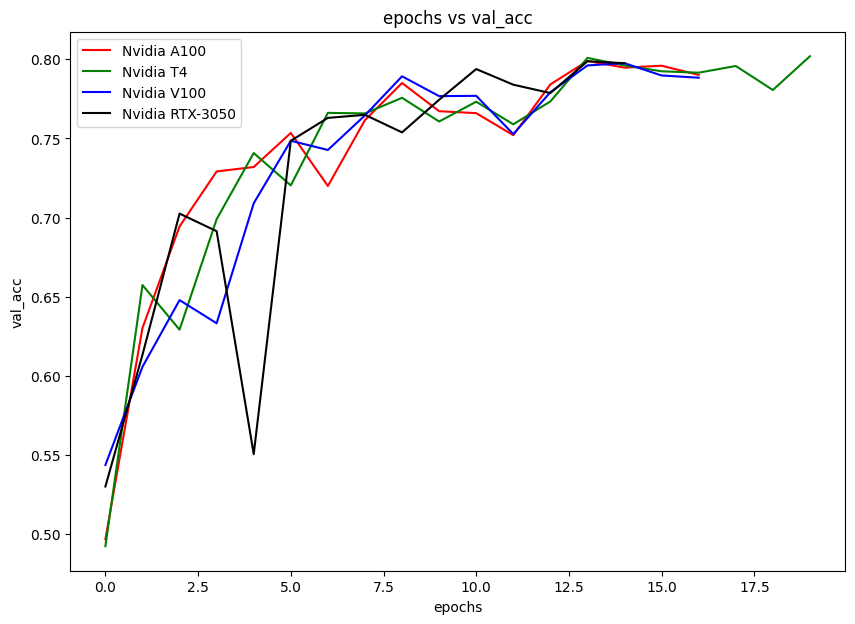

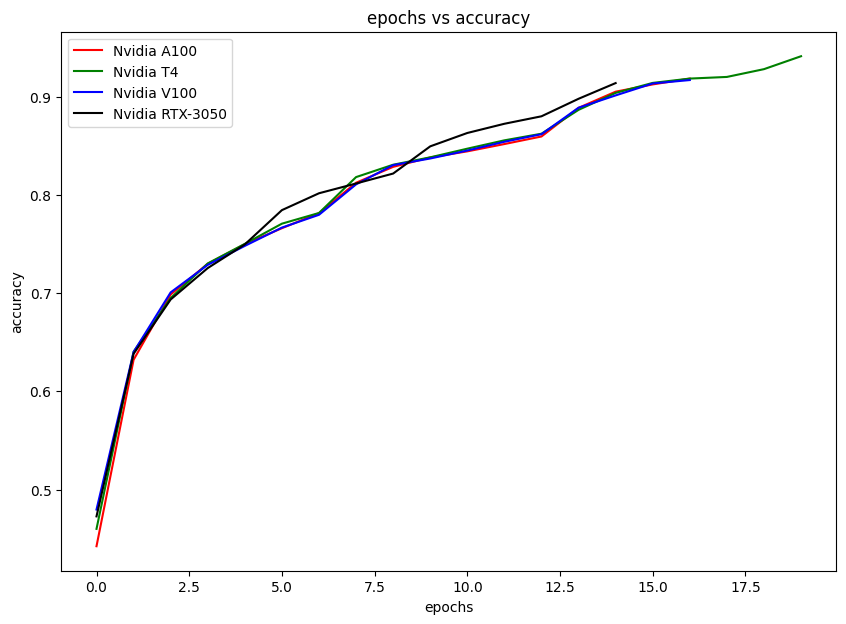

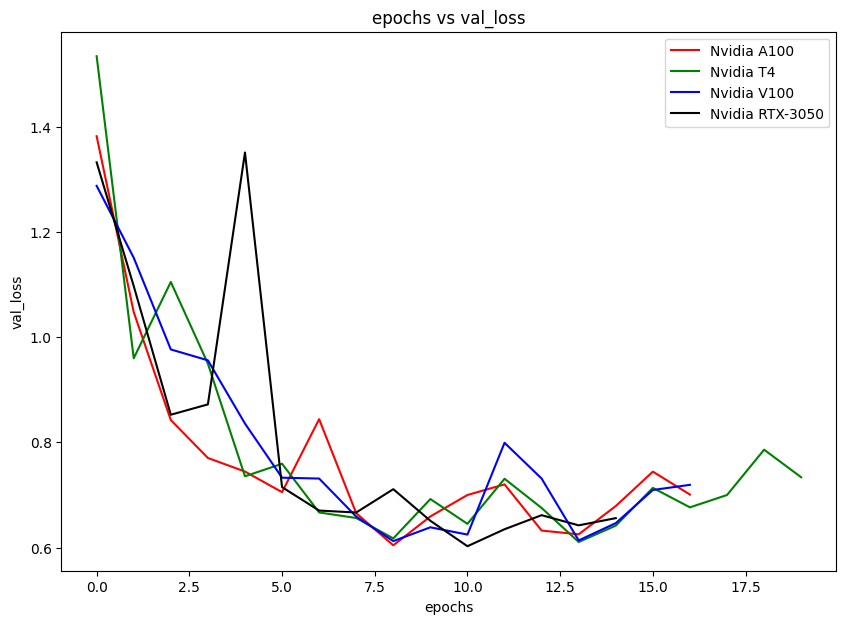

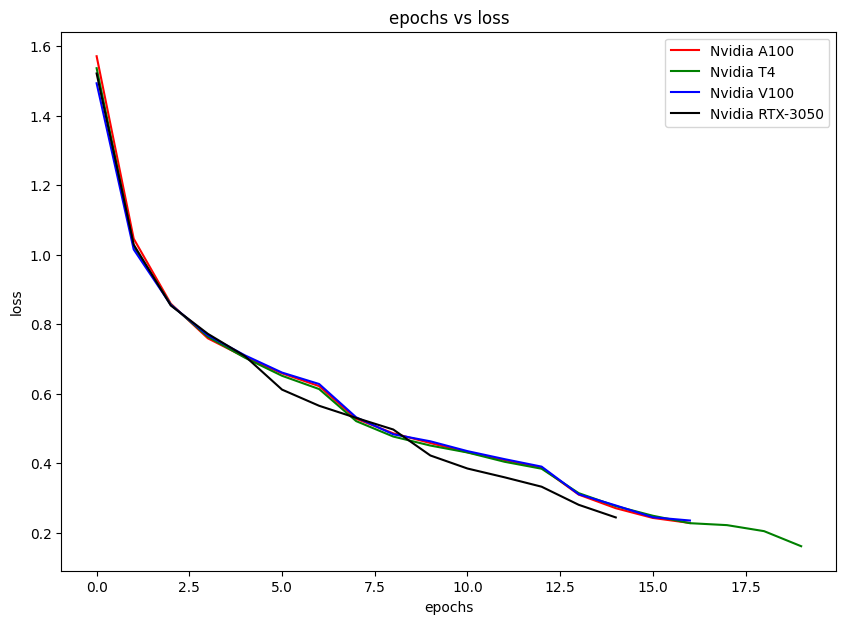

In [7]:
plot_hist(hist = vars,
            gpu_names = ["Nvidia A100","Nvidia T4","Nvidia V100","Nvidia RTX-3050"],
            savefig=True)

In [1]:
def plot_hist(hist:list =[], gpu_names:list =[],savefig = False):
    """
    Plots the Accuracy, Loss Val_Accuracy and Val_Loss of the given models in a subplot grid
    """
    if (len(hist) != len(gpu_names)):
        raise ValueError("Wrong Input size")   
    import matplotlib.pyplot as plt
    val_acc=[]
    val_loss=[]
    loss=[]
    accuracy=[]
    metrics=[val_acc,accuracy,val_loss,loss]
    metrics_title=["val_acc","accuracy","val_loss","loss"]
    for history in hist:
        accuracy.append(history["accuracy"][:20])
        val_acc.append(history["val_accuracy"][:20])
        loss.append(history["loss"][:20])
        val_loss.append(history["val_loss"][:20])

    # plt.figure(figsize=(16,16))
    # c=['g','r','b','orange',"black"]
    c=["r","g","b","black"]
    for j in range(len(metrics)):
        # plt.subplot(2,2,j+1)
        plt.figure(figsize=(10,7))
        for i in range(len(hist)):
            plt.plot(metrics[j][i],c=c[i],label=gpu_names[i])
        plt.title(f"epochs vs {metrics_title[j]}")
        plt.xlabel("epochs")
        plt.ylabel(metrics_title[j])
        plt.legend()
        plt.savefig(f"plot_model/plot_dcnn_gpu/{metrics_title[j]}")
    # if savefig:
    #     plt.savefig('plot_model/gpu_dcnn')
    plt.show()